In [5]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('churn.csv')
data = df.copy()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null object
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(7), object(6)
memory usage: 546.9+ KB


In [50]:
print(data.shape)
data.head(5)

(3333, 17)


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False.


In [8]:
data.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [10]:
data['Area Code'] = data['Area Code'].astype('object')

In [11]:
data.describe(include=['O'])

,State,Area Code,Phone,Int'l Plan,VMail Plan,Churn?
count,3333,3333,3333,3333,3333,3333
unique,51,3,3333,2,2,2
top,WV,415,413-5306,no,no,False.
freq,106,1655,1,3010,2411,2850


In [22]:
print('Churn Rate: {} %'.format(round(sum(np.where(data['Churn?'] == 'False.', 0, 1)) * 100.0 / len(data['Churn?']),2)))

Churn Rate: 14.49 %


In [31]:
target_variable = ['Churn?']
id_variable = ['Phone']

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

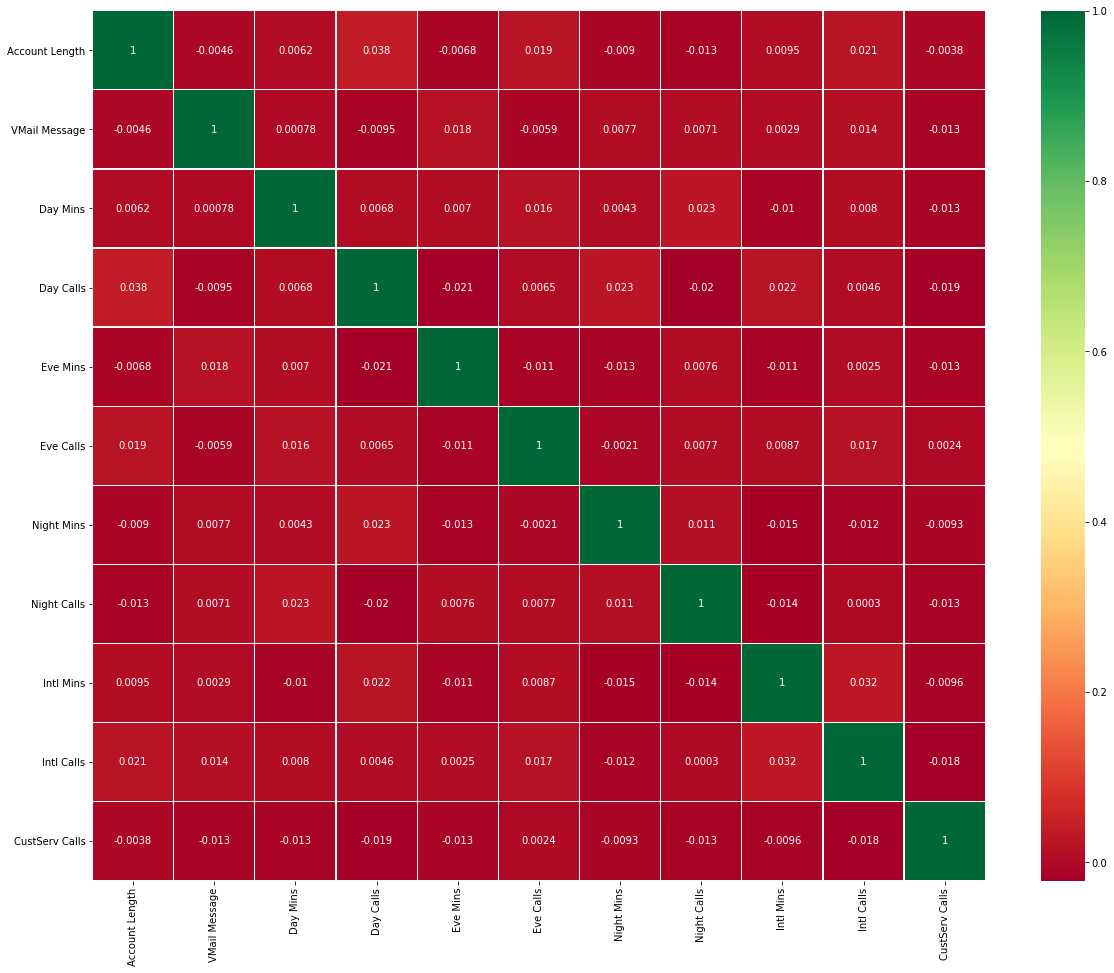

In [40]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(20,16)
plt.show()

In [39]:
data.drop(columns = ['Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge'], inplace = True)

In [44]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum() / data.count() * 100).sort_values(ascending = False)
missing_train_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_train_data

,Total,Percent
Churn?,0,0.0
Day Mins,0,0.0
Account Length,0,0.0
Area Code,0,0.0
Phone,0,0.0
Int'l Plan,0,0.0
VMail Plan,0,0.0
VMail Message,0,0.0
Day Calls,0,0.0
CustServ Calls,0,0.0


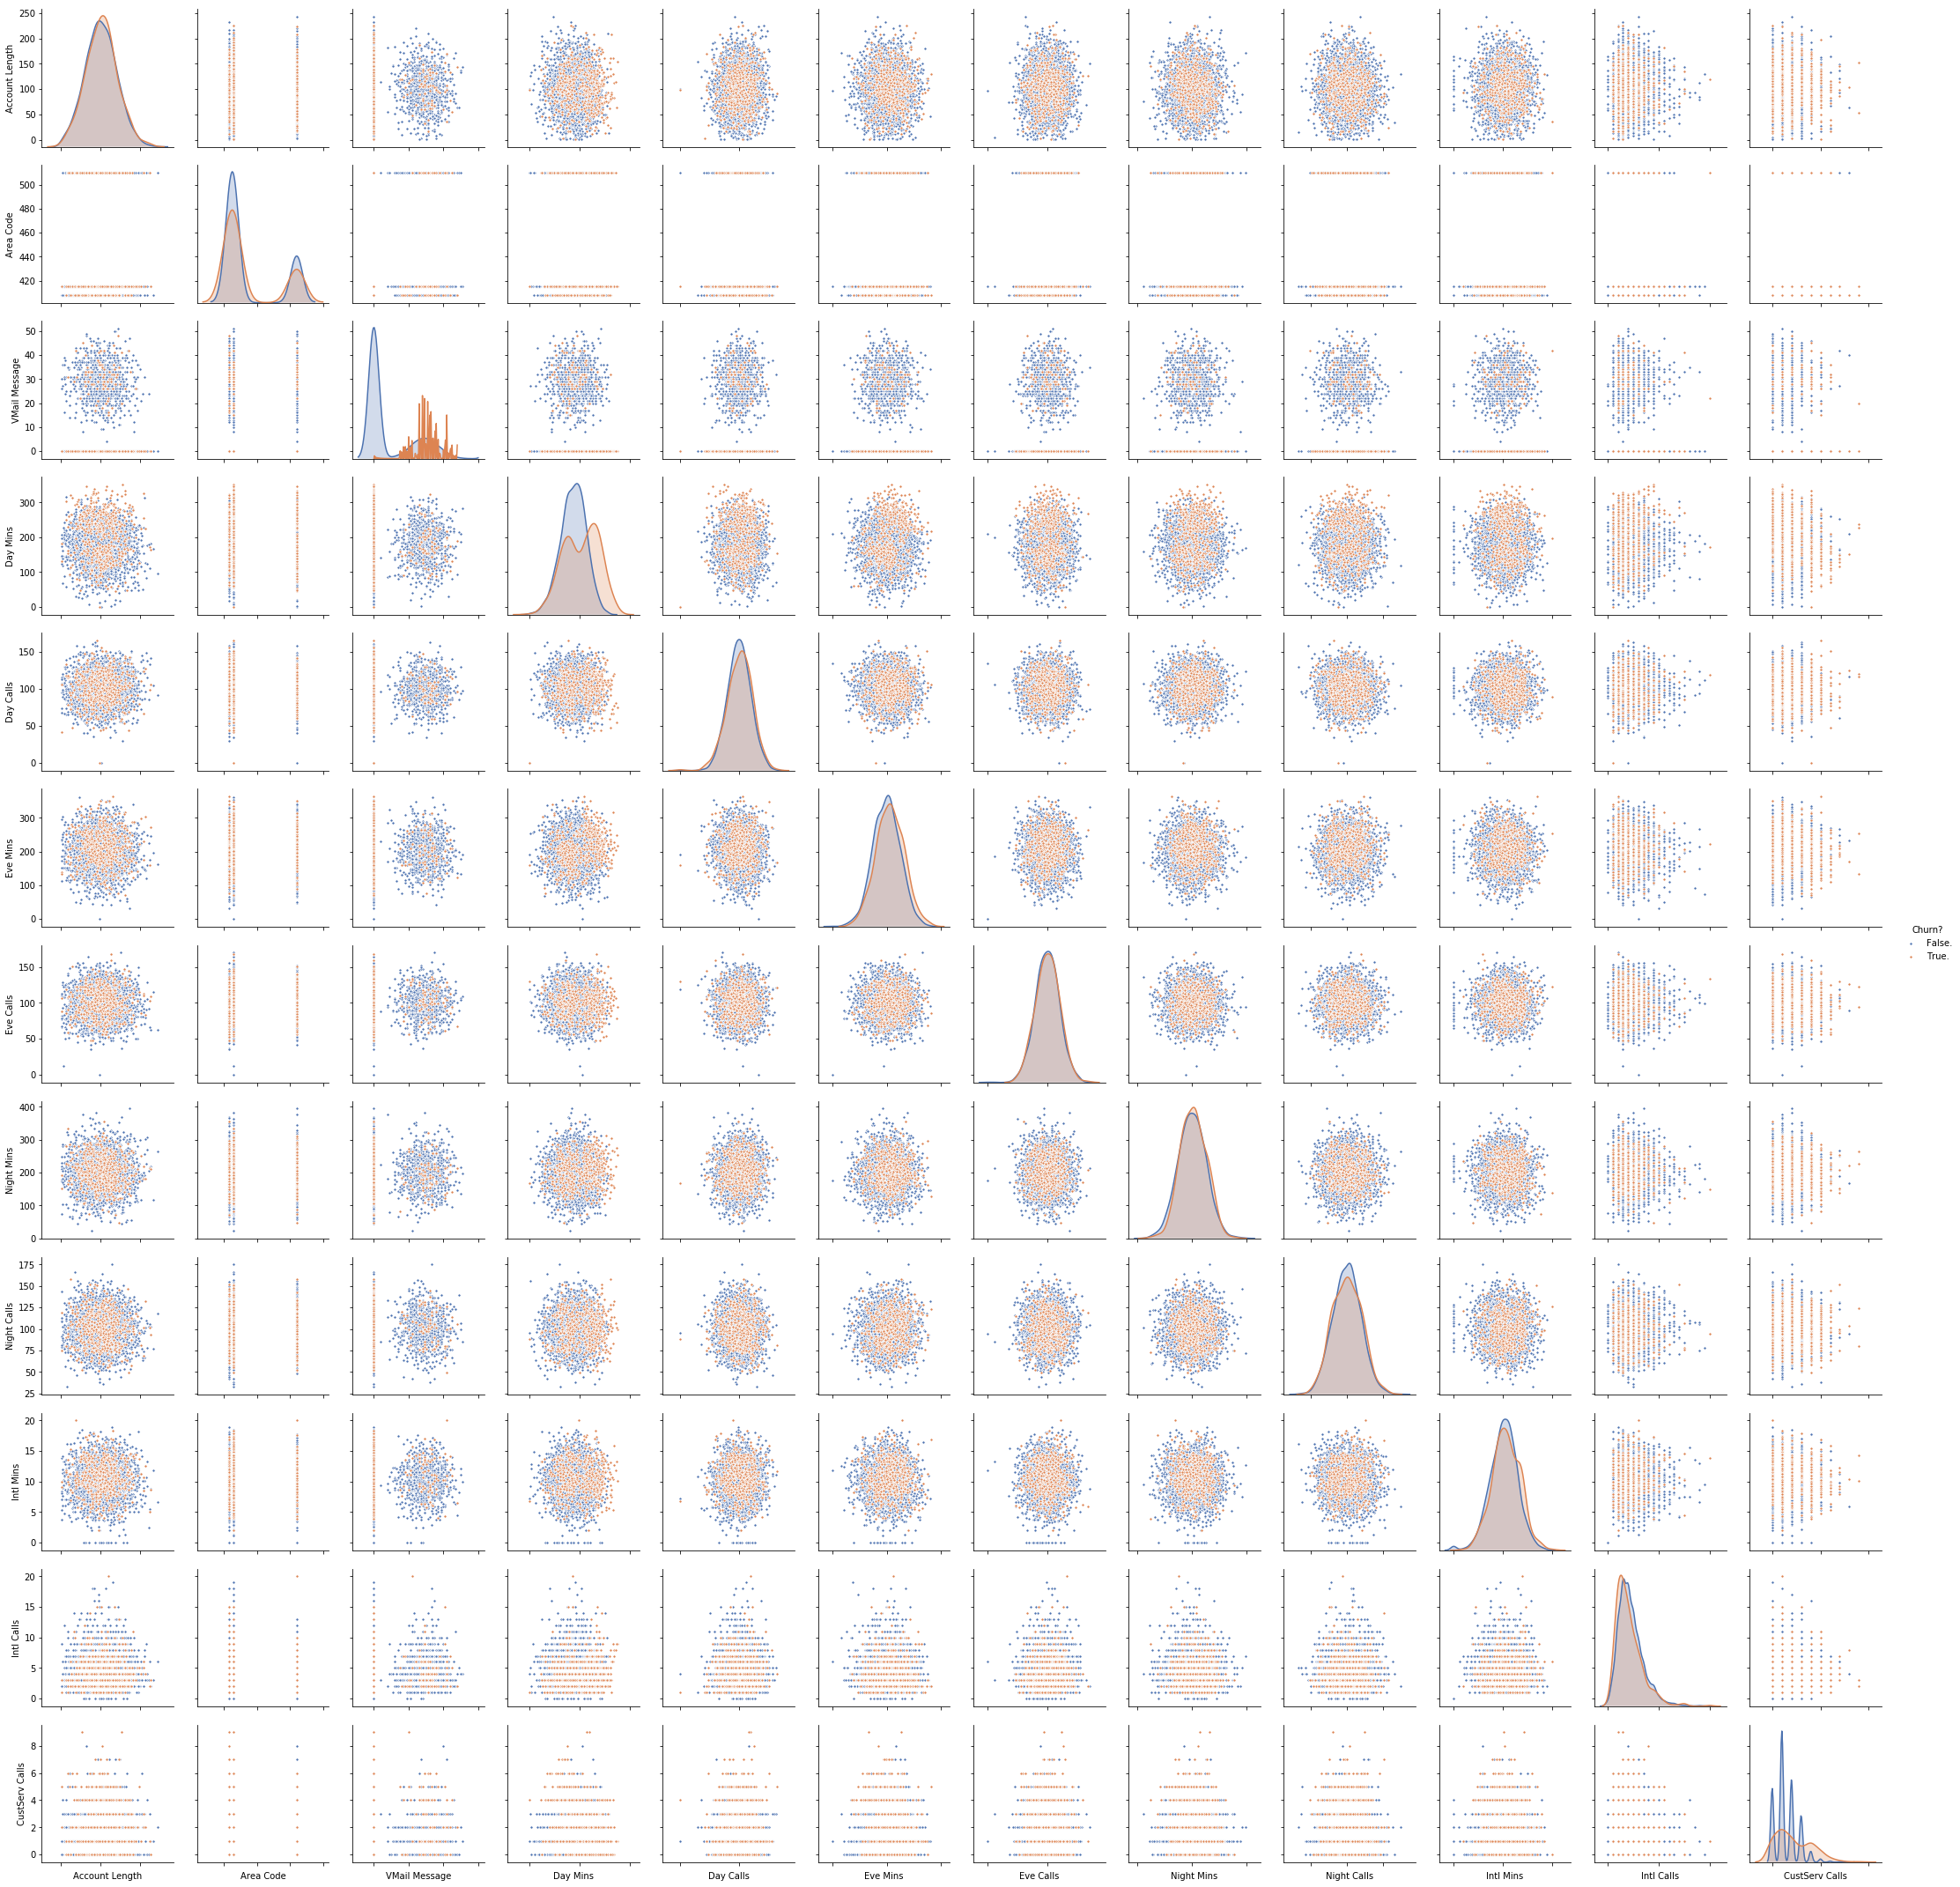

In [47]:
pp = sns.pairplot(data, hue = 'Churn?', palette = 'deep', height = 2.5, diag_kind = 'kde', diag_kws = dict(shade=True),
                 plot_kws=dict(s=10))
pp.set(xticklabels=[])
plt.show()

In [48]:
X = data.drop(target_variable + id_variable, axis=1)
y = data[target_variable]
ids = data[id_variable]

In [51]:
X_with_dummy_features = pd.get_dummies(X, drop_first=True)
y_with_dummy_features = pd.get_dummies(y, drop_first=True)

In [56]:
from sklearn.model_selection import train_test_split

In [61]:
xtrain, xtest, ytrain, ytest, id_train, id_test = train_test_split(X_with_dummy_features, y_with_dummy_features,
                                                                  ids, test_size = 0.5, stratify = y_with_dummy_features,
                                                                  random_state = 1000)

print('No. of True classes in training data set for ' , ytrain.values.ravel().sum())
print('No. of True classes in testing data set for ' , ytest.values.ravel().sum())

print('Ratio of True Cases in training data set ' , round(ytrain.values.ravel().sum() / len(ytrain.values.ravel()), 2))
print('Ratio of True Cases in testing data set ' , round(ytest.values.ravel().sum() / len(ytest.values.ravel()), 2))

No. of True classes in training data set for  241
No. of True classes in testing data set for  242
Ratio of True Cases in training data set  0.14
Ratio of True Cases in testing data set  0.15


# Machine Learning 

In [62]:
eval_results_compare = pd.DataFrame()

In [63]:
from sklearn.linear_model import LogisticRegression

In [73]:
model_name = 'Logistic Regression'
logreg = LogisticRegression(solver='liblinear', multi_class='ovr', n_jobs=1)
trained_model_lr = logreg.fit(xtrain, ytrain.values.ravel())

In [74]:
print('Trained model :: ', trained_model_lr)

Trained model ::  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [76]:
prob_test = trained_model_lr.predict_proba(xtest)
prob_train = trained_model_lr.predict_proba(xtrain)

pred_test = trained_model_lr.predict(xtest)
pred_train = trained_model_lr.predict(xtrain)

In [77]:
from sklearn.metrics import roc_auc_score

In [79]:
auc_score = roc_auc_score(ytest, prob_test[:,1])
print('\n\nModel ROC-AUC score for Validation Sample: %.3f'  % auc_score)



Model ROC-AUC score for Validation Sample: 0.800


In [80]:
from sklearn.metrics import accuracy_score

In [85]:
train_acc = accuracy_score(ytrain.values.ravel(), pred_train)
test_acc = accuracy_score(ytest.values.ravel(), pred_test)
print('\nTrain Accuracy :: ', round(train_acc, 4))
print('\nTest Accuracy :: ', round(test_acc, 4))


Train Accuracy ::  0.8637

Test Accuracy ::  0.8602


In [86]:
import scikitplot as skplt


 Confusion Matrix: 



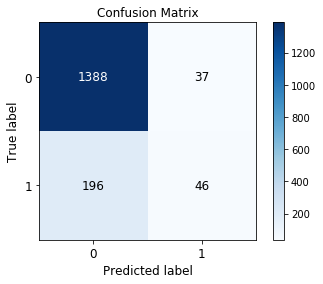

In [87]:
print('\n Confusion Matrix: \n')
skplt.metrics.plot_confusion_matrix(ytest.values.ravel(), pred_test, title='Confusion Matrix', text_fontsize='large')
plt.show()

In [89]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

In [90]:
report = classification_report(ytest, pred_test)
precision, recall, fscore, support = precision_recall_fscore_support(ytest, pred_test, average='weighted')
print('\n Classification report (weighted average across classes) :: \n', classification_report(ytest, pred_test))


 Classification report (weighted average across classes) :: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1425
           1       0.55      0.19      0.28       242

   micro avg       0.86      0.86      0.86      1667
   macro avg       0.72      0.58      0.60      1667
weighted avg       0.83      0.86      0.83      1667



In [93]:
from sklearn.metrics import precision_recall_curve

In [94]:
p, r, thresholds = precision_recall_curve(ytest, prob_test[:,1])

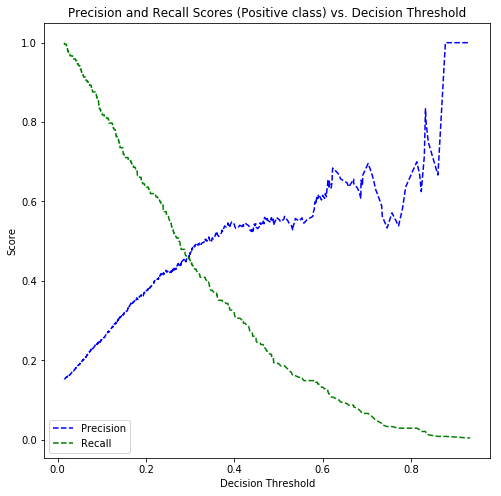

In [100]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds) :
    plt.figure(figsize=(8,8))
    plt.title('Precision and Recall Scores (Positive class) vs. Decision Threshold')
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'Recall')
    plt.ylabel('Score')
    plt.xlabel('Decision Threshold')
    plt.legend(loc = 'best')

plot_precision_recall_vs_threshold(p, r, thresholds)
plt.show()

In [104]:
from calculate_model_metrics import lift_plot_model, plot_roc, plot_grid_search, evaluate_model

Lift plot for validation Sample


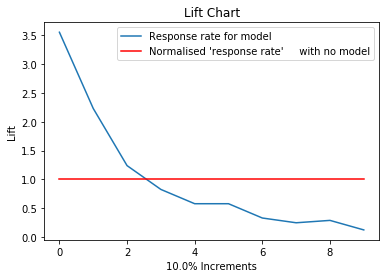

ROC curve for the validaton Sample


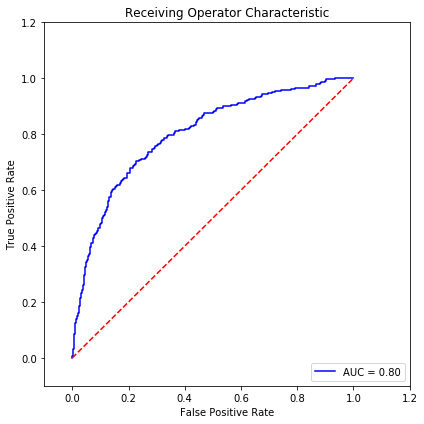

<Figure size 432x432 with 0 Axes>

In [106]:
eval_result_LR = evaluate_model(model_name, trained_model_lr, xtrain, xtest, ytrain, ytest, verbose=False)
eval_results_compare = eval_results_compare.append(eval_result_LR)
eval_results_compare.reset_index(drop=True, inplace=True)

In [107]:
eval_results_compare

,Model,AUC,Test Accuracy,Recall_1,Precision_1,F1 Score_1,Log loss,Decile_1 Lift %,Decile_2 Lift %
0,Logistic Regression,0.800325,0.860228,0.190083,0.554217,0.283077,0.336664,3.55372,2.2314
